In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
def sigmoid(z):
    
    g = 1.0/(1 + np.exp(-z))
    
    return g

In [3]:
def hypothesis(X,theta):

    h = sigmoid(X@theta);
        
    return h

In [4]:
def loss(Y, h):
    
    loss = -np.mean(Y*(np.log(h)) + (1-Y)*np.log(1-h))
    
    return loss

In [5]:
def get_gradients(h, Y, theta):
    
    m = h.shape[0]
    
    gradients = (1/m)*(( h - Y ).T @ X);
    
    return gradients.T

In [6]:
def gradient_descent(X, Y, theta, alpha, nepochs):
    
    losses = []    

    for epoch in range(nepochs):

        h = hypothesis(X, theta)
        
        gradients = get_gradients(h, Y, theta)
        
        theta = theta - alpha*gradients
        
        losses.append(loss(Y,h))

    return theta, losses       

In [7]:
def Logistic_Regression(X, Y, nepochs, alpha):
    
    m, n = X.shape
    
    theta = np.zeros((X.shape[1], 1))

    Y = Y.reshape(m,1)
    
    theta, losses = gradient_descent(X, Y, theta, alpha, nepochs)
    
    plot_cost(losses, nepochs)
    
    return theta

In [8]:
def accuracy(Y, y):
    
    accuracy = np.sum(Y == y) / len(Y)
    
    return accuracy

Helper functions

In [9]:
def load_data():
    
    X, y = make_moons(n_samples=100, noise=0.24)
    
    return X,y

In [10]:
def normalize(X, bias_added=True):
    
    mu = X.mean(axis=0, keepdims=True)
    std = X.std(axis=0, keepdims=True)
    
    if bias_added==True:
        mu[0,0]=0
        std[0,0]=1
    
    X = (X-mu)/std
    
    return X, mu, std

def normalize_test(X, mu, std, bias_added=True):
    
    if bias_added==False:
        mu=mu[:,1:]
        std=std[:1:]
    
    X = (X-mu)/std
    
    return X

In [11]:
def predict(X, theta, mu, std):
    
    X = normalize_test(X, mu, std)

    h = hypothesis(X, theta)

    preds = [1 if i > 0.5 else 0 for i in h]
    
    return np.array(preds)

In [12]:
def plot_cost(losses, nepochs):
    
    nepochs = range(1,nepochs+1)
    losses = np.array(losses)
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(nepochs, losses, 'm', linewidth = "5")
    plt.show()

In [13]:
def plot_data(X, y):

    fig = plt.figure(figsize=(10,8))
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='r', marker='X', s=200)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], facecolors='none', edgecolors='b', s=200)

    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Random Classification data with 2 features')


In [14]:
def plot_decision_boundary(X, y,theta):

    x1 = [min(X[:,0]), max(X[:,0])]
    x2 = (-1./theta[2])*(theta[1]*x1 + theta[0]);
    
    fig = plt.figure(figsize=(10,8))
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='r', marker='X', s=200)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], facecolors='none', edgecolors='b', s=200)

    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

Training

In [15]:
X, Y = load_data()

df = pd.DataFrame(X)
df.insert(0, "intercept", 1)
X = np.array(df, dtype=float)

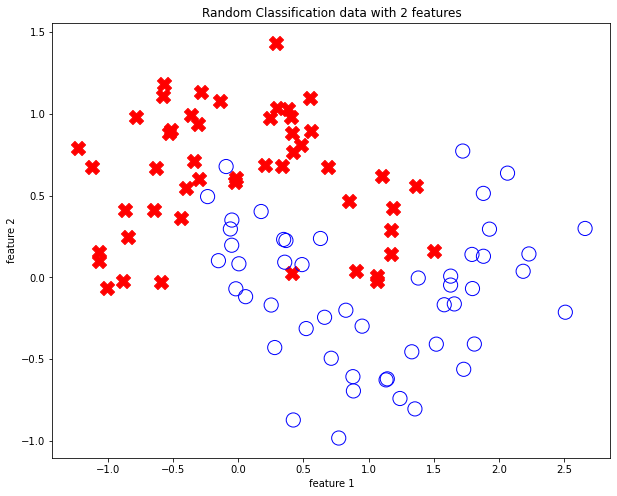

In [16]:
plot_data(X[:,1:],Y)

In [17]:
X, mu, std = normalize(X)

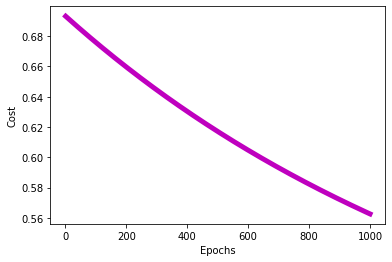

In [18]:
nepochs = 1000
alpha = 0.001

theta = Logistic_Regression(X, Y, nepochs, alpha)

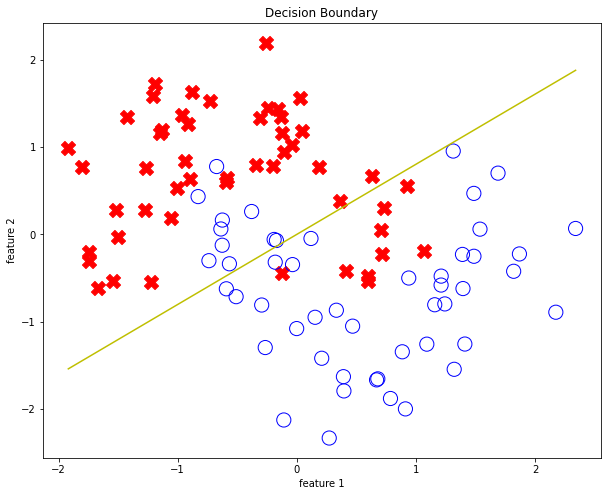

In [19]:
plot_decision_boundary(X[:,1:],Y, theta)

In [20]:
y = predict(X, theta, mu, std)

acc = accuracy(Y, y)

print("Accuracy of the model on training data is: {}%".format(acc*100))

Accuracy of the model on training data is: 83.0%
